# MA332 Project 1: Numerical Root Finding

Newton's Method
$$
x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

In [109]:
def newtons_method(f, df, x0, tol=1e-6):
    '''
        Slightly modified version of the function from NewtonsMethod.ipynb
    '''
    
    iMax = 1000
    i = 0

    x_n = x0
    
    stop_cond = 1 # allows the while loop to run the first time
    
    while stop_cond > tol:

        if i > iMax:
            return np.nan
       
        try:
            x = x_n - f(x_n)/df(x_n)
            
        except ZeroDivisionError:
            print("Derivative zero for x = ", x)
            sys.exit(1) 
    
        stop_cond = np.abs(x - x_n)
        
        x_n = x # Update x0 for the next iteration
        i += 1 # Update the iterate tracker

    return round(x, 3)

In [110]:
def check_convergence(f, df, x1, x2, n=100, tol=1e-6):

    results = np.empty(n)

    test_x = np.linspace(x1, x2, n)

    for i in range(n):

        results[i] = newtons_method(f, df, test_x[i], tol)

    return test_x, f(test_x), results

In [148]:
def plot_convergence(axes, f, df, x1, x2, n=100, tol=1e-6):

    x, y, roots = check_convergence(f, df, x1, x2, n, tol)

    axes.plot(x, y)

    axes.axhline(color='Black', lw=1)
    axes.axvline(color='Black', lw=1)

    for i in range(1, len(roots)-1):
        if np.isnan(roots[i]):

            fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
            fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

            axes.fill_between(fill_x, fill_y, 0, color='Red')

    print(np.unique(np.asarray(roots)))

In [91]:
def color_convergence(f, df, x1, x2, n=100, tol=1e-6):

    x, y, roots = check_convergence(f, df, x1, x2, n, tol)

    fig, axes = plt.subplots()

    axes.plot(x, y)

    axes.axhline(color='Black', lw=1)
    axes.axvline(color='Black', lw=1)

    for i in range(1, len(roots)-1):
        print(roots[i])
        if roots[i] == np.nan:

            fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
            fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

            axes.fill_between(fill_x, fill_y, 0, color='Red')

    plt.legend()
    plt.show()

[-1.771    nan]


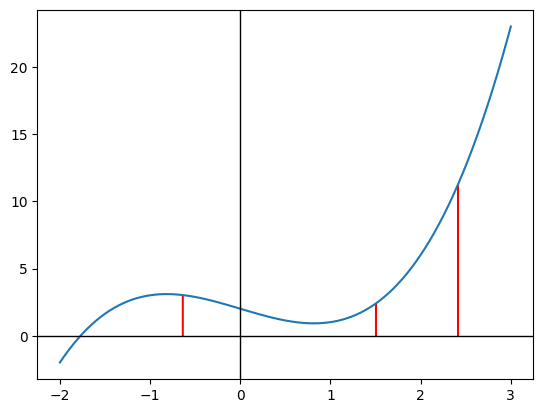

In [152]:
g = lambda x: x**3 - 2*x + 2.01626
dg = lambda x: 3*x**2 - 2

fig, axes = plt.subplots()
plot_convergence(axes, g, dg, -2, 3, n=1000)
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation

fig, axes = plt.subplots()

def animate(t):
    axes.plot()